In [1]:
# Importing Libraries
import os
import librosa
import soundfile
import torch

import numpy as np
import matplotlib.pyplot as plt
import librosa.display

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
from sklearn import preprocessing

def extract_features_song_get_means(song):
    print(song)
    rate = 22050
    y, _ = librosa.load(song, sr = rate)

    # get Mel-frequency cepstral coefficients
    #print(y.shape)
    #sample = 2000000
    #mfcc = librosa.feature.mfcc(y = y[:sample])
    # normalize values between -1,1 (divide by max)
    #mfcc /= np.amax(np.absolute(mfcc))
    magnitude = np.abs(librosa.stft(y))
    mel_spec = librosa.feature.melspectrogram(S = magnitude**2)
    mfcc = librosa.feature.mfcc(S = librosa.power_to_db(mel_spec))
    chroma = librosa.feature.chroma_stft(S = magnitude)
    
    # tempo, beat_frames = librosa.beat.beat_track(y = snippet, sr = sr)
    # cq_chroma = librosa.feature.chroma_cqt(y = snippet, sr = sr)
    # onset_env = librosa.onset.onset_strength(y = snippet, sr=sr)
    features = np.concatenate((mel_spec, mfcc, chroma), axis=0)
    print(features.shape)
    #return np.ndarray.flatten(features)
    return np.array(features)

In [4]:
import glob
# Prepare a list for all the features and all the labels
all_features = []
all_labels = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/"
genres = ["Progressive", 'Non_Progressive/Top_Of_The_Pops', 'Non_Progressive/Other_Songs']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        if 'jazz.00054.wav' in song:
            features = extract_features_song_get_means(sound_files[i - 1])
        else:
            features = extract_features_song_get_means(song)

        all_features.append(features)
        if genre == 'Progressive':
            all_labels.append(0)
        else:
            all_labels.append(1)

Processing 142 songs in Progressive genre...
Prog_Dataset/Progressive/01. The Same River.mp3
(160, 31090)
Prog_Dataset/Progressive/Pain of Salvation - The Perfect Element I - 02. In the Flesh.mp3
(160, 22242)
Prog_Dataset/Progressive/06. Anekdoten - Our Days Are Numbered.mp3
(160, 22235)
Prog_Dataset/Progressive/02. The Road Of Bones.mp3
(160, 22069)
Prog_Dataset/Progressive/01_Genesis_Watcher of the Skies.mp3
(160, 19089)
Prog_Dataset/Progressive/La conquista della posizione eretta.mp3
(160, 22510)
Prog_Dataset/Progressive/Kraftwerk - 01 - Autobahn.mp3
(160, 58840)
Prog_Dataset/Progressive/02 - Odyssey.mp3
(160, 19672)
Prog_Dataset/Progressive/01-The Bryden 2-Step (For Amphibians), Pt.1.mp3
(160, 23028)
Prog_Dataset/Progressive/01 - Phaedra.mp3
(160, 43402)
Prog_Dataset/Progressive/08 - Octavarium.mp3
(160, 62017)
Prog_Dataset/Progressive/05_Arriving Somewhere but Not Here.mp3
(160, 31103)
Prog_Dataset/Progressive/Kansas_08_Magnum_Opus.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 20630146.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 22211)
Prog_Dataset/Progressive/Baris_Manco_Bay_Koca_Destani_2023.mp3
(160, 33139)
Prog_Dataset/Progressive/05_Schism.mp3
(160, 17553)
Prog_Dataset/Progressive/12 - The Garden.mp3
(160, 18064)
Prog_Dataset/Progressive/03_Anesthetize.mp3
(160, 45779)
Prog_Dataset/Progressive/01-Zarathustra.mp3
(160, 53137)
Prog_Dataset/Progressive/Procol_Harum_In_Held.mp3
(160, 45613)
Prog_Dataset/Progressive/105-emerson_lake_and_palmer-karn_evil_9_1st_impression_(part_1).mp3
(160, 22179)
Prog_Dataset/Progressive/Appena un poco.mp3
(160, 20092)
Prog_Dataset/Progressive/01-genesis-dancing_with_the_moonlit_knight.mp3
(160, 20804)
Prog_Dataset/Progressive/Syzygy_Dialectic.mp3
(160, 42812)
Prog_Dataset/Progressive/05. Part V.mp3
(160, 13980)
Prog_Dataset/Progressive/05-Nine Feet Underground.mp3
(160, 58746)
Prog_Dataset/Progressive/(Disc 2) 01 - Telepathic Minds.mp3
(160, 44700)
Prog_Dataset/Progressive/05 - Starless.mp3
(160, 32145)
Prog_Dataset/Progressive/103 Epitaph.mp3
(160, 22937)
Prog_Dataset/P

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 22511)
Prog_Dataset/Progressive/06 - Ultimo Entardecer.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 24536)
Prog_Dataset/Progressive/01 - Songs From The Wood (2003 Digital Remaster).mp3
(160, 12729)
Prog_Dataset/Progressive/01_Yours Is No Disgrace.mp3
(160, 25082)
Prog_Dataset/Progressive/01-The runaway.mp3
(160, 18752)
Prog_Dataset/Progressive/01 - Luminol.mp3
(160, 31444)
Prog_Dataset/Progressive/01_Shine On You Crazy Diamond I.mp3
(160, 35009)
Prog_Dataset/Progressive/08 - Kingdom Of Dreams.mp3
(160, 17604)
Prog_Dataset/Progressive/03. Omen.mp3
(160, 33559)
Prog_Dataset/Progressive/05 Soup.mp3
(160, 27239)
Prog_Dataset/Progressive/08. Guardian.mp3
(160, 19475)
Prog_Dataset/Progressive/01 Peaches En Regalia.mp3
(160, 9422)
Prog_Dataset/Progressive/5 A Sprinkling Of Clouds.mp3
(160, 23152)
Prog_Dataset/Progressive/09 Heart Of The Sunrise.mp3
(160, 29832)
Prog_Dataset/Progressive/01_-_the_revealing_science_of_god_-_dance_of_the_dawn_320_lame_cbr.mp3
(160, 52805)
Prog_Dataset/Progressive/05_The_Afternoon_a_Afternoon_b_Evening.mp3
(160, 21686)
Prog_Dataset/Progressive/05. When the

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 60665)
Prog_Dataset/Progressive/04-Stranger In Your Soul_Resampled.mp3
(160, 77530)
Prog_Dataset/Progressive/01. Vert.mp3
(160, 14447)
Prog_Dataset/Progressive/02_Dogs.mp3
(160, 44202)
Prog_Dataset/Progressive/03 A Plague of Lighthouse Keepers.mp3
(160, 59978)
Prog_Dataset/Progressive/The Flower Kings - 1997 Stardust We Are CD2 - 11 - Stardust We Are.mp3
(160, 64759)
Prog_Dataset/Progressive/07 - Zartlicher Abschied.mp3
(160, 16212)
Prog_Dataset/Progressive/03_YYZ_Rush_Moving_Pictures_Deluxe_Edition_2011.mp3
(160, 11451)
Prog_Dataset/Progressive/04_La_Villa_Strangiato_Rush_Hemispheres_Deluxe_Edition.mp3
(160, 24774)
Prog_Dataset/Progressive/05 Red Shift.mp3
(160, 21207)
Prog_Dataset/Progressive/08-This Strange Engine.mp3
(160, 78558)
Prog_Dataset/Progressive/08 - Lady Fantasy.mp3
(160, 41584)
Prog_Dataset/Progressive/01 - School.mp3
(160, 14401)
Prog_Dataset/Progressive/03 - Suenos De Maniqui.mp3
(160, 24083)
Prog_Dataset/Progressive/01.A passion play 1.mp3
(160, 59713)
Prog_Data

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 16714)
Prog_Dataset/Progressive/Frances the Mute-The Mars Volta-05-Cassandra Geminni 1.mp3
(160, 12304)
Prog_Dataset/Progressive/06-king_crimson-larks_tounges_in_aspic_(part_ii).mp3
(160, 19121)
Prog_Dataset/Progressive/07 A Louse Is Not A Home.mp3
(160, 32351)
Prog_Dataset/Progressive/01 - Birds of Fire.mp3
(160, 14969)
Prog_Dataset/Progressive/101 21st Century Schizoid Man.mp3
(160, 19137)
Prog_Dataset/Progressive/05 - Vivaldi.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 19417)
Prog_Dataset/Progressive/01-hymn_of_the_seventh_galaxy_320_lame_cbr.mp3
(160, 9129)
Prog_Dataset/Progressive/Big Big Train - English Electric (Part Two) - 01 - East Coast Racer.mp3
(160, 40613)
Prog_Dataset/Progressive/09 - Headlong Flight.mp3
(160, 18964)
Prog_Dataset/Progressive/04 Black Rose Immortal.mp3
(160, 52306)
Prog_Dataset/Progressive/01_-_ace_of_wands_320_lame_cbr.mp3
(160, 14000)
Prog_Dataset/Progressive/02 Scorched Earth.mp3
(160, 25112)
Prog_Dataset/Progressive/04 - The River Under.mp3
(160, 22420)
Prog_Dataset/Progressive/5  The architect.mp3
(160, 12421)
Prog_Dataset/Progressive/09 - Ice (Remastered 2023).mp3
(160, 26508)
Prog_Dataset/Progressive/103 Moon In June.mp3
(160, 49440)
Prog_Dataset/Progressive/02 Can You Understand.mp3
(160, 26842)
Prog_Dataset/Progressive/12-animals_as_leaders-song_of_solomon.mp3
(160, 10946)
Prog_Dataset/Progressive/02. Bleed (live).mp3
(160, 19514)
Prog_Dataset/Progressive/4 Foxlight.mp3
(160, 34419)
Prog_Dataset/Progressive/0

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 21676)
Prog_Dataset/Progressive/13 - A Day in the Life.mp3
(160, 14381)
Processing 87 songs in Non_Progressive/Top_Of_The_Pops genre...
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2001_Train_Drops_Of_Jupiter.mp3
(160, 1596)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1945_Harry_James_and_Kitty_Kallen_It_s_Been_A_Long_Long_Time.mp3
(160, 9123)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2021_Silk_Sonic_Leave_the_Door_Open.mp3
(160, 10696)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1965_Beach_Boys_California_Girls.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 6825)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2008_Alicia_Keys_No_One.mp3
(160, 10931)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1958_The_Champs_Tequila.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 5689)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2007_Fergie_Big_Girls_Don_t_Cry.mp3
(160, 11547)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1964_The_Beatles_I_Want_To_Hold_Your_Hand.mp3
(160, 6244)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1960_Bryan_Hyland_Itsy_Bitsy.mp3
(160, 6130)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2003_Evanescence_Bring_Me_To_Life.mp3
(160, 10160)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1966_The_Rolling_Stones_Paint_It_Black.mp3
(160, 9704)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2023_Morgan_Wallen_Last_Night.mp3
(160, 6960)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2012_Taylor_Swift_We_Are_Never_Getting_Back_Together.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 7797061.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 8323)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1978_Bee_Gees_Night_Fever.mp3
(160, 9191)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1976_Eagles_Hotel_California.mp3
(160, 16811)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1977_ABBA_Dancing_Queen.mp3
(160, 10019)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2011_Adele_Rolling_In_The_Deep.mp3
(160, 9875)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2020_BTS_Dynamite.mp3
(160, 8573)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2002_Linkin_Park_In_The_End.mp3
(160, 9343)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1980_Pink_Floyd_Another_Brick_In_The_Wall_Part_II.mp3
(160, 10289)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1989_Milli_Vanilli_Girl_You_Know_It_s_True.mp3
(160, 11001)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1992_Nirvana_Smells_Like_Teen_Spirit.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 13002)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1996_Alanis_Morissette_Ironic.mp3
(160, 9906)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2022_Kendrick_Lamar_Beth_Gibbons_Mother_I_Sober.mp3
(160, 17509)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2004_Usher_Yeah.mp3
(160, 10783)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1955_Bill_Haley_And_His_Comets_Rock_Around_The_Clock.mp3
(160, 6067)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1973_Diana_Ross_Touch_Me_In_The_Morning.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 8836)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1940_Tommy_Dorsey_I_ll_Never_Smile_Again.mp3
(160, 8241)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2009_Beyonce_Single_Ladies_Put_A_Ring_On_It.mp3
(160, 8403)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1986_Mr._Mister_Broken_Wings.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 8066079.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 14474)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1997_The_Verve_Bittersweet_Symphony.mp3
(160, 15436)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1998_Celine_Dion_My_Heart_Will_Go_On.mp3
(160, 12073)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1967_The_Doors_Light_My_Fire.mp3
(160, 18454)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2005_Kelly_Clarkson_Since_U_Been_Gone.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 8084)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1942_Kay_Kyser_Praise_the_Lord_and_Pass_the_Ammunition.mp3
(160, 6465)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1962_Ray_Charles_I_Can_t_Stop_Loving_You.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 10922)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1993_Snap_Rhythm_Is_A_Dancer.mp3
(160, 14309)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1949_Vaughan_Monroe_Riders_In_The_Sky.mp3
(160, 7798)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1943_Duke_Ellington_In_A_Sentimental.mp3
(160, 9771)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1982_Foreigner_Waiting_For_A_Girl_Like_You.mp3
(160, 12482)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1983_Police_Every_Breath_You_Take.mp3
(160, 10954)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1994_Ace_Of_Base_All_That_She_Wants.mp3
(160, 9049)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2010_Lady_Gaga_Telephone.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 5460065.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 9734)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1952_Vera_Lynn_Auf_Wiederseh`n_Sweetheart.mp3
(160, 7241)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2014_Katy_Perry_Roar.mp3
(160, 11591)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1969_Neil_Diamond_Sweet_Caroline.mp3


Note: Illegal Audio-MPEG-Header 0x00544147 at offset 3412749.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 9195)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1968_Steppenwolf_Born_To_Be_Wild.mp3
(160, 9172)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1953_Les_Paul_And_Mary_Ford_Vaya_Con_Dios.mp3
(160, 7299)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1957_Harry_Belafonte_Banana_Boat_Song.mp3
(160, 8066)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1971_Rod_Stewart_Maggie_May.mp3
(160, 14904)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1981_Kim_Carnes_Bette_Davis_Eyes.mp3
(160, 10017)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2000_Sting_Desert_Rose.mp3
(160, 12320)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1954_Rosemary_Clooney_Hey_There.mp3
(160, 8402)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1948_Peggy_Lee_Manana.mp3
(160, 7673)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1970_Simon_and_Garfunkel_Bridge_Over_Troubled_Water.mp3
(160, 12623)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1999_Britney_Spears_...Baby_One_More_Time.mp3
(160, 9255)
Prog_Dataset/Non_Progressive/

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
Note: Illegal Audio-MPEG-Header 0x42696c6c at offset 3302120.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 5927)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1991_Mariah_Carey_Someday.mp3
(160, 15904)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2019_Ariana_Grande_Thank_U,_Next.mp3
(160, 14235)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1979_The_Knack_My_Sharona.mp3


[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x4f09842e at offset 3049050.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_3471998/2405025507.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song, sr = rate)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(160, 5853)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2017_Migos_Bad_&_Boujee.mp3
(160, 14407)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1995_Hootie_And_The_Blowfish_Hold_My_Hand.mp3
(160, 11017)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1956_Elvis_Presley_Heartbreak_Hotel.mp3
(160, 5547)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1947_Francis_Craig_and_His_Orchestra_Near_You.mp3
(160, 7549)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1946_Perry_Como_Prisoner_of_Love.mp3
(160, 8685)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2015_Rihanna_FourFiveSeconds.mp3
(160, 8112)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1987_Heart_Alone.mp3
(160, 9445)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1985_Wham_Careless_Whisper.mp3
(160, 16755)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1963_Peter_Paul_And_Mary_Puff_The_Magic_Dragon.mp3
(160, 8983)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1941_Glenn_Miller_Chatanooga_Choo_Choo.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 2806046.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 7550)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1930_Josephine_Baker_J`ai_Deux_Amours.mp3
(160, 7172)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2013_Bruno_Mars_Locked_Out_Of_Heaven.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 10059)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2018_Drake_God_s_Plan.mp3
(160, 15370)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1959_Johnny_Horton_The_Battle_Of_New_Orleans.mp3
(160, 6540)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2006_Kanye_West_Gold_Digger.mp3
(160, 8975)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1975_America_Sister_Golden_Hair.mp3
(160, 8451)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1944_Les_Brown_Twilight_Time.mp3
(160, 8973)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1951_Tony_Bennett_Because_Of_You.mp3
(160, 7704)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2001_Alan_Jackson_Where_Were_You.mp3
(160, 13316)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1990_Michael_Bolton_How_Am_I_Supposed_To_Live_Without_You.mp3
(160, 11098)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1988_INXS_Need_You_Tonight.mp3
(160, 7993)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1972_Don_McLean_American_Pie.mp3
(160, 22094)
Prog_Dataset/Non_Progressive/Top_Of_T

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 8262)
Prog_Dataset/Non_Progressive/Other_Songs/01_Pulcinella_1st_scene_Overture.mp3
(160, 5399)
Prog_Dataset/Non_Progressive/Other_Songs/Green Day -07- Basket Case.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
/tmp/ipykernel_3471998/2405025507.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song, sr = rate)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(160, 7892)
Prog_Dataset/Non_Progressive/Other_Songs/Symphony_40_G_Minor.mp3
(160, 20252)
Prog_Dataset/Non_Progressive/Other_Songs/04 The Unforgettable Fire.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 12806)
Prog_Dataset/Non_Progressive/Other_Songs/CCR_Who_ll Stop The Rain.mp3
(160, 6449)
Prog_Dataset/Non_Progressive/Other_Songs/13 - So Long, Farewell.mp3
(160, 7556)
Prog_Dataset/Non_Progressive/Other_Songs/08 - Damage Inc  (LP Version).mp3
(160, 14270)
Prog_Dataset/Non_Progressive/Other_Songs/07_Johnny B. Goode.mp3
(160, 6947)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Immigrant Song.mp3
(160, 7215)
Prog_Dataset/Non_Progressive/Other_Songs/08 Behind Blue Eyes.mp3
(160, 9584)
Prog_Dataset/Non_Progressive/Other_Songs/Christine_and_the_Queens_People_Ive_Been_Sad.mp3
(160, 11240)
Prog_Dataset/Non_Progressive/Other_Songs/01 - I.G.Y..mp3
(160, 15717)
Prog_Dataset/Non_Progressive/Other_Songs/10 - 2000 Miles .mp3
(160, 9379)
Prog_Dataset/Non_Progressive/Other_Songs/10. Michael Sembello - Maniac.mp3
(160, 10877)
Prog_Dataset/Non_Progressive/Other_Songs/07 Say It Ain_t So.mp3
(160, 11151)
Prog_Dataset/Non_Progressive/Other_Songs/08 - Anarchy In The U.K.mp3
(160, 9151)
Prog_Dataset/N

[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 8848353.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_3471998/2405025507.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song, sr = rate)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(160, 12651)
Prog_Dataset/Non_Progressive/Other_Songs/09Henry Mancini - Peter Gunn.mp3
(160, 5489)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Someone In The Crowd.mp3
(160, 11181)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Big Chief.mp3
(160, 8457)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Mustt Mustt (Lost in His Work).mp3
(160, 13705)
Prog_Dataset/Non_Progressive/Other_Songs/07 - While The Earth Sleeps (feat Peter Gabriel).mp3
(160, 16529)
Prog_Dataset/Non_Progressive/Other_Songs/02 Aja.mp3
(160, 20572)
Prog_Dataset/Non_Progressive/Other_Songs/O_Re_Piya_Rahat Fateh Ali Khan_ Salim-Sulaiman.mp3
(160, 16326)
Prog_Dataset/Non_Progressive/Other_Songs/05 Homewrecker.mp3
(160, 9955)
Prog_Dataset/Non_Progressive/Other_Songs/01 - End Titles from Blade Runner.mp3
(160, 12879)
Prog_Dataset/Non_Progressive/Other_Songs/03 Midnight At The Bazaar.mp3
(160, 22276)
Prog_Dataset/Non_Progressive/Other_Songs/1-01 Eruption.mp3
(160, 4459)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Tiempo Al

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 8933388.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 9547)
Prog_Dataset/Non_Progressive/Other_Songs/Hallelujah_Kate_McKinnon.mp3
(160, 7851)
Prog_Dataset/Non_Progressive/Other_Songs/Chinna Chinna Aasai - ROJA.mp3
(160, 12580)
Prog_Dataset/Non_Progressive/Other_Songs/23-The-Weeknd---I-Feel-It-Coming-(Feat-Daft-Punk).mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 10880470.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 11598)
Prog_Dataset/Non_Progressive/Other_Songs/03 - Angel of Music.mp3
(160, 6063)
Prog_Dataset/Non_Progressive/Other_Songs/www.NewAlbumReleases.net_14 - Hyyerr (Feat. Chip Tha Ripper).mp3


Note: Illegal Audio-MPEG-Header 0x46656174 at offset 5182435.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 9140)
Prog_Dataset/Non_Progressive/Other_Songs/Aphex Twin - Avril 14th.mp3
(160, 5226)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Devil_s Advocate _ Bambodansarna.mp3
(160, 15315)
Prog_Dataset/Non_Progressive/Other_Songs/05 - Go to the West - Meeting in Menggu Tents - Be Together - Sister Liu.mp3
(160, 12257)
Prog_Dataset/Non_Progressive/Other_Songs/04-deacon_blues_320_lame_cbr.mp3
(160, 19641)
Prog_Dataset/Non_Progressive/Other_Songs/02. Ascension (feat. Vince Staples).mp3
(160, 6712)
Prog_Dataset/Non_Progressive/Other_Songs/03 - Don_t Believe The Hype.mp3
(160, 13756)
Prog_Dataset/Non_Progressive/Other_Songs/Serge_Prokofiev_1.mp3
(160, 19467)
Prog_Dataset/Non_Progressive/Other_Songs/10 All Is Full Of Love.mp3
(160, 11760)
Prog_Dataset/Non_Progressive/Other_Songs/07_Summoning Of The Muse.mp3
(160, 12735)
Prog_Dataset/Non_Progressive/Other_Songs/04 Dounounia.mp3
(160, 13937)
Prog_Dataset/Non_Progressive/Other_Songs/7 - The Hurt Inside.mp3
(160, 14502)
Prog_Dataset/Non_Progress

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 7564)
Prog_Dataset/Non_Progressive/Other_Songs/01 Machu Picchu.mp3
(160, 9028)
Prog_Dataset/Non_Progressive/Other_Songs/06 - Janelle Monae - Cold War.mp3
(160, 8770)
Prog_Dataset/Non_Progressive/Other_Songs/02_Violin_Concerto_in_D_Major_Adagio.mp3
(160, 22395)
Prog_Dataset/Non_Progressive/Other_Songs/09-Year Of The Cat.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 17115)
Prog_Dataset/Non_Progressive/Other_Songs/Ali Farka Toure with Ry Cooder - Talking Timbuktu - 10 - Diaraby.mp3
(160, 19250)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Zombified.mp3
(160, 8486)
Prog_Dataset/Non_Progressive/Other_Songs/05 we_re drowning in it.mp3
(160, 5190)
Prog_Dataset/Non_Progressive/Other_Songs/05 - Modern Love (2002 Remastered Version).mp3
(160, 10279)
Prog_Dataset/Non_Progressive/Other_Songs/05 Clocks.mp3
(160, 13211)
Prog_Dataset/Non_Progressive/Other_Songs/03 Space Song.mp3
(160, 13802)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Somebody Told Me.mp3
(160, 8491)
Prog_Dataset/Non_Progressive/Other_Songs/01-Light - Look At Your Sun.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 17052)
Prog_Dataset/Non_Progressive/Other_Songs/06 - De Música Ligera (Remasterizado 2007).mp3
(160, 9164)
Prog_Dataset/Non_Progressive/Other_Songs/Ursine Vulpine ft Annaca   Wicked Game (Lyrics).mp3
(160, 11834)
Prog_Dataset/Non_Progressive/Other_Songs/01 Styx - Grand Illusion.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 10986313.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 11829)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Interstate Love Song.mp3
(160, 8320)
Prog_Dataset/Non_Progressive/Other_Songs/13 Famous Last Words.mp3
(160, 12972)
Prog_Dataset/Non_Progressive/Other_Songs/19 - Tusk.mp3
(160, 9052)
Prog_Dataset/Non_Progressive/Other_Songs/11 - Your Lucky Day In Hell.mp3
(160, 11490)
Prog_Dataset/Non_Progressive/Other_Songs/12 - Buckingham Green.mp3
(160, 8540)
Prog_Dataset/Non_Progressive/Other_Songs/03 - No Doubt - Just a Girl.mp3
(160, 9013)
Prog_Dataset/Non_Progressive/Other_Songs/04 Cracker - Low.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 11902)
Prog_Dataset/Non_Progressive/Other_Songs/08 All the Small Things.mp3
(160, 7238)
Prog_Dataset/Non_Progressive/Other_Songs/01-Janitor Of Lunacy.mp3
(160, 10459)
Prog_Dataset/Non_Progressive/Other_Songs/09 - Money For Nothing (Album Version).mp3
(160, 21726)
Prog_Dataset/Non_Progressive/Other_Songs/05-Flourescent Adolescent.mp3
(160, 7646)
Prog_Dataset/Non_Progressive/Other_Songs/Cranberries - 04 - Zombie.mp3
(160, 13202)
Prog_Dataset/Non_Progressive/Other_Songs/03. Rag Doll.mp3
(160, 11404)
Prog_Dataset/Non_Progressive/Other_Songs/07. Black Hole Sun.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 13721)
Prog_Dataset/Non_Progressive/Other_Songs/1-03 Wonderwall.mp3
(160, 11145)
Prog_Dataset/Non_Progressive/Other_Songs/07 - Wake Up.mp3
(160, 14442)
Prog_Dataset/Non_Progressive/Other_Songs/06 - Disarm.mp3
(160, 8548)
Prog_Dataset/Non_Progressive/Other_Songs/Cosmia.mp3
(160, 18738)
Prog_Dataset/Non_Progressive/Other_Songs/06 Felt Mountain.mp3
(160, 11072)
Prog_Dataset/Non_Progressive/Other_Songs/09 - Dilettante.mp3
(160, 10490)
Prog_Dataset/Non_Progressive/Other_Songs/07 Eight Miles High.mp3
(160, 9380)
Prog_Dataset/Non_Progressive/Other_Songs/10 - Don_t You Want Me - The Human League.mp3
(160, 10352)
Prog_Dataset/Non_Progressive/Other_Songs/Gin_Blossoms_Hey_Jealousy.mp3
(160, 10193)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Ted Just Admit it.......mp3
(160, 18907)
Prog_Dataset/Non_Progressive/Other_Songs/01 - It_s The End Of The World As We Know It (And I Feel Fine) (Edit) (2006 Digital Remaster).mp3
(160, 10556)
Prog_Dataset/Non_Progressive/Other_Songs/11 - Inoculate the

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(160, 7770)
Prog_Dataset/Non_Progressive/Other_Songs/02-blondie-call_me-rns.mp3
(160, 9122)
Prog_Dataset/Non_Progressive/Other_Songs/02. Planet Earth.mp3
(160, 10458)
Prog_Dataset/Non_Progressive/Other_Songs/24_Billy_Vaughan_Orange_Blossom_Special.mp3
(160, 6673)
Prog_Dataset/Non_Progressive/Other_Songs/22 Turn On The News.mp3
(160, 11532)
Prog_Dataset/Non_Progressive/Other_Songs/Billy Joel - It_s Still Rock And Roll To Me.mp3
(160, 7635)
Prog_Dataset/Non_Progressive/Other_Songs/09 I_m Just a Singer (In a Rock and Roll Band).mp3
(160, 11129)
Prog_Dataset/Non_Progressive/Other_Songs/06 Tales Of Brave Ulysses.mp3
(160, 7296)
Prog_Dataset/Non_Progressive/Other_Songs/07 - You Really Got Me.mp3
(160, 5800)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Loser.mp3
(160, 10151)
Prog_Dataset/Non_Progressive/Other_Songs/09 - Golden Brown [Explicit].mp3
(160, 8957)
Prog_Dataset/Non_Progressive/Other_Songs/101-led_zeppelin-immigrant_song.mp3
(160, 6335)
Prog_Dataset/Non_Progressive/Other_Songs/06 N

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 10147253.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 10920)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Arc of a Diver.mp3
(160, 14146)
Prog_Dataset/Non_Progressive/Other_Songs/07-do_it_again_320_lame_cbr.mp3
(160, 15250)
Prog_Dataset/Non_Progressive/Other_Songs/13. Frank Sinatra - The Girl From Ipanema.mp3
(160, 8343)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Blinded By The Light.mp3
(160, 18371)
Prog_Dataset/Non_Progressive/Other_Songs/20 - They Can_t Take That Away from Me (Remastered).mp3
(160, 8624)
Prog_Dataset/Non_Progressive/Other_Songs/11 - Lonely People.mp3
(160, 6471)
Prog_Dataset/Non_Progressive/Other_Songs/(06) [Alice Cooper] No More Mr. Nice Guy.mp3
(160, 8033)
Prog_Dataset/Non_Progressive/Other_Songs/3. My Beautiful Dark Twisted Fantasy - POWER.mp3
(160, 12582)
Prog_Dataset/Non_Progressive/Other_Songs/08-love_to_love_320_lame_cbr.mp3
(160, 19785)
Prog_Dataset/Non_Progressive/Other_Songs/Kind Of Blue-Miles Davis-02-Freddie Freeloader.mp3
(160, 25369)
Prog_Dataset/Non_Progressive/Other_Songs/08 Listen.mp3
(160, 1

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 18882356.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(160, 20110)
Prog_Dataset/Non_Progressive/Other_Songs/09_Jewel Of The Summertime.mp3
(160, 10074)
Prog_Dataset/Non_Progressive/Other_Songs/03 - The national anthem.mp3


Note: Illegal Audio-MPEG-Header 0x040cfffb at offset 7708883.
Note: Trying to resync...
Note: Skipped 2 bytes in input.
[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0xb0049200 at offset 7710137.
Note: Trying to resync...
Note: Skipped 285 bytes in input.


(160, 13838)
Prog_Dataset/Non_Progressive/Other_Songs/03 - Take Five (LP Version).mp3
(160, 25367)
Prog_Dataset/Non_Progressive/Other_Songs/09. Tel Aviv.mp3
(160, 13668)
Prog_Dataset/Non_Progressive/Other_Songs/06. In A Gadda Da Vida.mp3
(160, 44038)
Prog_Dataset/Non_Progressive/Other_Songs/17 - Cross Road Blues (take 1).mp3
(160, 6900)


In [5]:
max_shape = -1
for i in range(len(all_features)):
    max_shape = max(max_shape, all_features[i].shape[1])
    #print(len(all_features[i])/160)
    #all_features[i] = all_features[i].reshape(160,all_features[i].shape[2])

In [6]:
def to_shape(a, shape):
    y_, x_ = shape
    y, x = a.shape
    y_pad = (y_-y)
    x_pad = (x_-x)
    #print(x_pad, y_pad)
    return np.pad(a,((y_pad//2, y_pad//2 + y_pad%2), 
                     (0, x_pad)),
                  mode = 'constant')

In [7]:
dict_max = {}
for i in range(0, 160):
    dict_max[i] = -1
for song in all_features:
    for i in range(0, 160):
        dict_max[i] = max(dict_max[i], np.amax(song[i]))
for song in all_features:
    for i in range(0, 160):
        song[i] = song[i] / dict_max[i]

In [8]:
for index, song in enumerate(all_features):
    shape = [160, max_shape]
    all_features[index] = to_shape(song, shape)

In [9]:
features=np.stack(all_features)

In [10]:
labels=np.stack(all_labels)

In [11]:
features = features.astype('float32')
labels = labels.astype('int64')

In [12]:
from torch.utils.data import TensorDataset, DataLoader

features_tensor = torch.from_numpy(features)
labels_tensor = torch.from_numpy(labels)
dataset = TensorDataset(features_tensor, labels_tensor)

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [400,len(all_features)-400])

len(train_ds), len(val_ds)

(400, 101)

In [43]:
batch_size = 16

train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size = batch_size, num_workers = 2, pin_memory = True)

In [44]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
device = get_default_device()    
train_loader = DeviceDataLoader(train_dl, device)
val_loader = DeviceDataLoader(val_dl, device)

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.utils import make_grid
import torchvision.models as models
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import librosa
import librosa.feature
import librosa.display
import glob
from matplotlib import pyplot as plt

In [17]:
import sklearn.metrics
def accuracy(outputs, labels):
    #_, preds = torch.max(outputs, dim=1)
    #return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    accuracy = sklearn.metrics.accuracy_score(labels, outputs.reshape((outputs.shape[0],)) > 0.5)
    #print(accuracy)
    return torch.tensor(accuracy, dtype=torch.float64)

class SongClassificationBase(nn.Module):
    
    def training_step(self, batch):
        #print(batch)
        songs, labels = batch 
        self.train()
        out = self(songs)                  # Generate predictions
        #print(song.shape)
        #print(out.reshape((out.shape[0],)), labels)
        #print(out.reshape((out.shape[0],)), labels)
        loss = F.binary_cross_entropy(out.reshape((out.shape[0],))  , labels.float()) # Calculate loss
        acc = accuracy(out, labels)
        return loss, acc
    
    def validation_step(self, batch):
        songs, labels = batch
        self.eval()
        out = self(songs)                    # Generate predictions
        #print(out.reshape((out.shape[0],)), labels)
        loss = F.binary_cross_entropy(out.reshape((out.shape[0],)), labels.float())   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        #print(batch_accs)
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['train_acc'], result['val_loss'], result['val_acc']))

In [18]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        train_acc = []
        lrs = []
        for batch in train_loader:
            loss, acc = model.training_step(batch)
            train_losses.append(loss)
            train_acc.append(acc)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_acc).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [19]:
class CNN1D(SongClassificationBase):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv1d(160, 16, kernel_size=20, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.MaxPool1d(5), # output: 64 x 32 x 32

            nn.Conv1d(16, 32, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(5), # output: 256 x 16 x 16

            nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(5),
            nn.Conv1d(64, 32, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(5),
            nn.Conv1d(32, 16, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.MaxPool1d(5),

            nn.Flatten(), 
            nn.Linear(560, 64),
            nn.ReLU(inplace = True),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )
        
    
    def forward(self, xb):
        out = self.model(xb)
        return torch.sigmoid(out)

In [46]:
epochs = 50
max_lr = 3e-4
opt_func = torch.optim.Adam
grad_clip = 1e-2
weight_decay = 1e-4
model1 = to_device(CNN1D(), device)

#model1 = to_device(FNN(), device)

In [47]:
history1 = []
history1 += fit_one_cycle(epochs, max_lr, model1, train_loader, val_loader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 0.6850, train_acc: 0.5650, val_loss: 0.6765, val_acc: 0.6589
Epoch [1], train_loss: 0.6383, train_acc: 0.7600, val_loss: 0.6568, val_acc: 0.6857
Epoch [2], train_loss: 0.5829, train_acc: 0.8025, val_loss: 0.5990, val_acc: 0.7304
Epoch [3], train_loss: 0.5101, train_acc: 0.8350, val_loss: 0.5312, val_acc: 0.7482
Epoch [4], train_loss: 0.4378, train_acc: 0.8425, val_loss: 0.4747, val_acc: 0.7661
Epoch [5], train_loss: 0.3751, train_acc: 0.8625, val_loss: 0.4286, val_acc: 0.8018
Epoch [6], train_loss: 0.3357, train_acc: 0.8800, val_loss: 0.3898, val_acc: 0.8107
Epoch [7], train_loss: 0.3142, train_acc: 0.8800, val_loss: 0.3440, val_acc: 0.8286
Epoch [8], train_loss: 0.2918, train_acc: 0.8775, val_loss: 0.3100, val_acc: 0.9196
Epoch [9], train_loss: 0.2904, train_acc: 0.8850, val_loss: 0.3056, val_acc: 0.8732
Epoch [10], train_loss: 0.2555, train_acc: 0.9025, val_loss: 0.2642, val_acc: 0.9464
Epoch [11], train_loss: 0.2682, train_acc: 0.8925, val_loss: 0.2896, val_ac

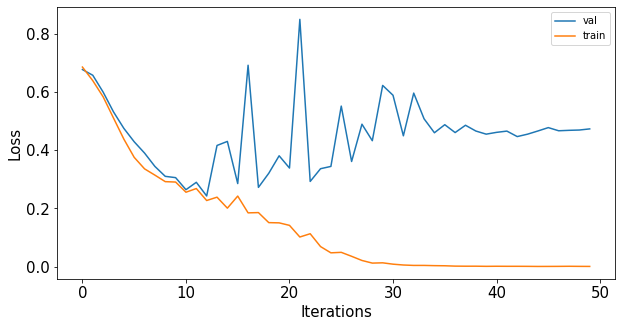

In [58]:
import matplotlib.pyplot as plt

val_acc = []
train_acc = []
for detail in history1:
    train_acc.append(detail['train_loss'])
    val_acc.append(detail['val_loss'])

plt.figure(figsize=(10,5))
#plt.title("Training and Validation Accuracy")
plt.plot(val_acc,label="val")
plt.plot(train_acc,label="train")
plt.xlabel("Iterations", size=15)
plt.ylabel("Loss", size=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend()
plt.show()
#plt.savefig('FC_curve.png')



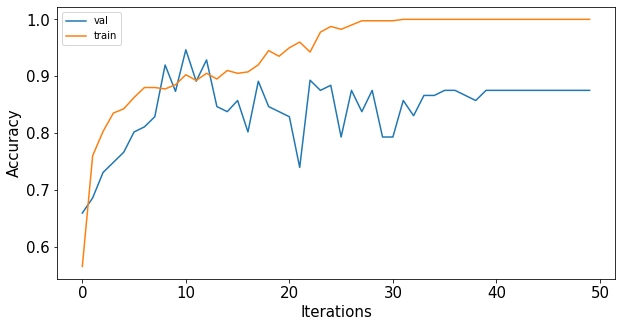

In [57]:
import matplotlib.pyplot as plt

val_acc = []
train_acc = []
for detail in history1:
    train_acc.append(detail['train_acc'])
    val_acc.append(detail['val_acc'])

plt.figure(figsize=(10,5))
#plt.title("Training and Validation Accuracy")
plt.plot(val_acc,label="val")
plt.plot(train_acc,label="train")
plt.xlabel("Iterations", size=15)
plt.ylabel("Accuracy", size=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend()
plt.show()
#plt.savefig('FC_curve.png')



In [59]:
train_dl_ = DataLoader(train_ds, batch_size = 600, num_workers = 2, pin_memory = True)
train_loader_ = DeviceDataLoader(train_dl_, device)
for state in train_loader_:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)
#plt.imshow(cm, cmap='binary')

[[106   0]
 [  0 294]]


In [170]:
val_dl = DataLoader(val_ds, batch_size = 120, num_workers = 2, pin_memory = True)
val_loader = DeviceDataLoader(val_dl, device)
for state in val_loader:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)
#plt.imshow(cm, cmap='binary')

[[30  6]
 [ 8 57]]


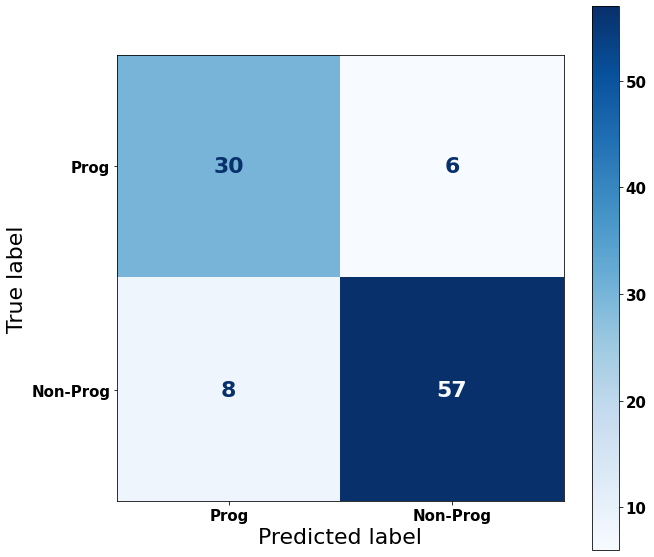

In [63]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Prog', 'Non-Prog'])

#cm_display.plot()
fig, ax = plt.subplots(figsize=(10,10))
font = {
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#plt.show()

In [171]:
wrong_sample = []
for sample, prediction, label in zip(state[0].numpy(), pred, state[1]):
    if (prediction[0]>0.5) != label.item():
        wrong_sample.append((sample, prediction[0]))

In [172]:
import glob
# Prepare a list for all the features and all the labels
song_names = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/"
genres = ["Progressive", 'Non_Progressive/Top_Of_The_Pops', 'Non_Progressive/Other_Songs']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        song_names.append(song)

Processing 142 songs in Progressive genre...
Processing 87 songs in Non_Progressive/Top_Of_The_Pops genre...
Processing 272 songs in Non_Progressive/Other_Songs genre...


In [173]:
wrong_prog = []
wrong_nonprog = []
for sample, prediction in wrong_sample:
    for index, feature in enumerate(all_features):
        check = True
        for i in range(feature.shape[0]):
            if abs(feature[50][i] - sample[50][i]) >= 10**-20:
                check = False
                break
        if check:
            if song_names[index][13] == 'P':
                #print(feature[50], sample[50])
                wrong_prog.append((song_names[index], prediction))
                #print(prediction)
            else:
                wrong_nonprog.append((song_names[index], 1-prediction))
                #print(1-prediction)
    #break
            #print(song_names[index])

In [186]:
res_dict = []
for song, prediction in wrong_prog:
    res_dict.append({'Song names':song[25:], 'Probability for wrong class': prediction, 'True label': 'Prog'})
for song, prediction in wrong_nonprog:
    res_dict.append({'Song names':song[41:], 'Probability for wrong class': prediction, 'True label': 'Non-Prog'})

In [187]:
# name of csv file
import csv

filename = "1D_CNN_Misclassification_Validation.csv"
fields = ['Song names', 'Probability for wrong class', 'True label']
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields)
 
    # writing headers (field names)
    writer.writeheader()
 
    # writing data rows
    writer.writerows(res_dict)

In [174]:
wrong_nonprog

[('Prog_Dataset/Non_Progressive/Other_Songs/01_Pulcinella_1st_scene_Overture.mp3',
  0.6292544901371002),
 ('Prog_Dataset/Non_Progressive/Other_Songs/05. Violin Concerto in E minor op.64 - I Allegro molto appassionato.mp3',
  0.9999807295662322),
 ('Prog_Dataset/Non_Progressive/Other_Songs/10 The Thrill Is Gone.mp3',
  0.7229859828948975),
 ('Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2001_Train_Drops_Of_Jupiter.mp3',
  0.93043003231287),
 ('Prog_Dataset/Non_Progressive/Other_Songs/16 - Madhuban Mein Radhika Nache Re (Kohinoor 1960).mp3',
  0.9124214872717857),
 ('Prog_Dataset/Non_Progressive/Other_Songs/04 - Vera.mp3',
  0.7757387608289719),
 ('Prog_Dataset/Non_Progressive/Other_Songs/03 - Take Five (LP Version).mp3',
  0.9398361369967461),
 ('Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1971_Rod_Stewart_Maggie_May.mp3',
  0.5754530429840088)]

In [90]:
wrong_prog

[('Prog_Dataset/Progressive/04 - The River Under.mp3', 0.82208675),
 ('Prog_Dataset/Progressive/06-king_crimson-larks_tounges_in_aspic_(part_ii).mp3',
  0.9895258),
 ('Prog_Dataset/Progressive/01 Peaches En Regalia.mp3', 0.9996263),
 ('Prog_Dataset/Progressive/01Al Di Meola - Flight over Rio.mp3', 0.8404518),
 ('Prog_Dataset/Progressive/05. Part V.mp3', 0.99689484),
 ('Prog_Dataset/Progressive/05 Red Shift.mp3', 0.9668197)]

In [96]:
from torchsummary.torchsummary import summary

summary(model1, (160,112931), batch_size=32, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1           [32, 16, 112914]          51,216
       BatchNorm1d-2           [32, 16, 112914]              32
              ReLU-3           [32, 16, 112914]               0
         MaxPool1d-4            [32, 16, 22582]               0
            Conv1d-5            [32, 32, 22580]           2,592
       BatchNorm1d-6            [32, 32, 22580]              64
              ReLU-7            [32, 32, 22580]               0
         MaxPool1d-8             [32, 32, 4516]               0
            Conv1d-9             [32, 64, 4514]          10,304
      BatchNorm1d-10             [32, 64, 4514]             128
             ReLU-11             [32, 64, 4514]               0
        MaxPool1d-12              [32, 64, 902]               0
           Conv1d-13              [32, 32, 900]          10,272
      BatchNorm1d-14              [32, 

In [90]:
print(model1)

CNN1D(
  (model): Sequential(
    (0): Conv1d(160, 16, kernel_size=(20,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(1,))
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(1,))
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (12): Conv1d(64, 32, kernel_size=(5,), stride=(1,), padding=(1,))
    (13): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPo

# Testing

In [ ]:
import glob
# Prepare a list for all the features and all the labels
all_features_test = []
all_labels_test = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Progressive", 'Non_Progressive']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        if 'jazz.00054.wav' in song:
            features = extract_features_song_get_means(sound_files[i - 1])
        else:
            features = extract_features_song_get_means(song)

        all_features_test.append(features)
        if genre == 'Progressive':
            all_labels_test.append(0)
        else:
            all_labels_test.append(1)

Processing 138 songs in Progressive genre...
Prog_Dataset/Test/Progressive/08 .3 1.m4a


/tmp/ipykernel_3471998/2405025507.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song, sr = rate)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(160, 14022)
Prog_Dataset/Test/Progressive/01 - Red.mp3
(160, 16224)
Prog_Dataset/Test/Progressive/10.Elegy.mp3
(160, 9412)
Prog_Dataset/Test/Progressive/05 Awaken.mp3
(160, 40403)
Prog_Dataset/Test/Progressive/01. Diana.mp3
(160, 11827)
Prog_Dataset/Test/Progressive/03 Nectar.mp3
(160, 26251)
Prog_Dataset/Test/Progressive/10_Sorrow.mp3
(160, 22772)
Prog_Dataset/Test/Progressive/08 - I Spy.mp3
(160, 15720)
Prog_Dataset/Test/Progressive/05. Vrooom.mp3
(160, 12640)
Prog_Dataset/Test/Progressive/01. Ka$cade.mp3
(160, 13943)
Prog_Dataset/Test/Progressive/06. Part VI.mp3
(160, 19335)
Prog_Dataset/Test/Progressive/05 - Entree.mp3
(160, 13665)
Prog_Dataset/Test/Progressive/02 - Xanadu.mp3
(160, 28636)
Prog_Dataset/Test/Progressive/01-Stand By.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


In [94]:
import glob
# Prepare a list for all the features and all the labels
song_names_test = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Progressive", 'Non_Progressive']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        song_names_test.append(song)

Processing 138 songs in Progressive genre...
Processing 133 songs in Non_Progressive genre...


In [33]:
for song in all_features_test:
    for i in range(0, 160):
        song[i] = song[i] / dict_max[i]
for index, song in enumerate(all_features_test):
    shape = [160, max_shape]
    all_features_test[index] = to_shape(song, shape)


In [38]:
for index, song in enumerate(all_features_test):
    all_features_test[index] = all_features_test[index].T

In [40]:
features_test=np.stack(all_features_test)
labels_test=np.stack(all_labels_test)
features_test = features_test.astype('float32')
labels_test = labels_test.astype('int64')
features_tensor_test = torch.from_numpy(features_test)
labels_tensor_test = torch.from_numpy(labels_test)
dataset_test = TensorDataset(features_tensor_test, labels_tensor_test)
test_dl = DataLoader(dataset_test, batch_size = 267, num_workers = 2, pin_memory = True)
test_loader = DeviceDataLoader(test_dl, device)

In [80]:
features_test.shape

(267, 160, 112931)

In [95]:
for state in test_loader:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)

[[ 80  56]
 [ 14 117]]


In [138]:
song_names_test

['Prog_Dataset/Test/Progressive/08 .3 1.m4a',
 'Prog_Dataset/Test/Progressive/01 - Red.mp3',
 'Prog_Dataset/Test/Progressive/10.Elegy.mp3',
 'Prog_Dataset/Test/Progressive/05 Awaken.mp3',
 'Prog_Dataset/Test/Progressive/01. Diana.mp3',
 'Prog_Dataset/Test/Progressive/03 Nectar.mp3',
 'Prog_Dataset/Test/Progressive/10_Sorrow.mp3',
 'Prog_Dataset/Test/Progressive/08 - I Spy.mp3',
 'Prog_Dataset/Test/Progressive/05. Vrooom.mp3',
 'Prog_Dataset/Test/Progressive/01. Ka$cade.mp3',
 'Prog_Dataset/Test/Progressive/06. Part VI.mp3',
 'Prog_Dataset/Test/Progressive/05 - Entree.mp3',
 'Prog_Dataset/Test/Progressive/02 - Xanadu.mp3',
 'Prog_Dataset/Test/Progressive/01-Stand By.mp3',
 'Prog_Dataset/Test/Progressive/02_Freewill.mp3',
 'Prog_Dataset/Test/Progressive/09_Lateralus.mp3',
 'Prog_Dataset/Test/Progressive/15 Third Eye.mp3',
 'Prog_Dataset/Test/Progressive/06. Hardcore.mp3',
 'Prog_Dataset/Test/Progressive/08 - Voyager.mp3',
 'Prog_Dataset/Test/Progressive/08 Los Endos.mp3',
 'Prog_Dataset/

In [96]:
wrong_sample_test = []
for sample, prediction, label in zip(state[0].numpy(), pred, state[1]):
    if (prediction[0]>0.5) != label.item():
        wrong_sample_test.append((sample, prediction[0]))

In [107]:
len(all_features_test)

267

In [118]:
wrong_prog_test = []
wrong_nonprog_test = []
for sample, prediction in wrong_sample_test:
    for index, feature in enumerate(all_features_test):
        check = True
        for i in range(feature.shape[0]):
            if abs(feature[50][i] - sample[50][i]) >= 10**-20:
                check = False
                break
        if check:
            if song_names_test[index][18] == 'P':
                #print(feature[50], sample[50])
                wrong_prog_test.append((song_names_test[index], prediction))
                #print(prediction)
            else:
                wrong_nonprog_test.append((song_names_test[index], 1-prediction))
                #print(1-prediction)
    #break
            #print(song_names[index])

In [149]:
res_dict = []
for song, prediction in wrong_prog_test:
    res_dict.append({'Song names':song[30:], 'Probability for wrong class': prediction, 'True label': 'Prog'})
for song, prediction in wrong_nonprog_test:
    res_dict.append({'Song names':song[34:], 'Probability for wrong class': prediction, 'True label': 'Non-Prog'})

In [148]:
wrong_nonprog_test[0][0][34:]

'08 - Kollaps.wma'

In [150]:
# name of csv file
import csv

filename = "1D_CNN_Misclassification_Test.csv"
fields = ['Song names', 'Probability for wrong class', 'True label']
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields)
 
    # writing headers (field names)
    writer.writeheader()
 
    # writing data rows
    writer.writerows(res_dict)

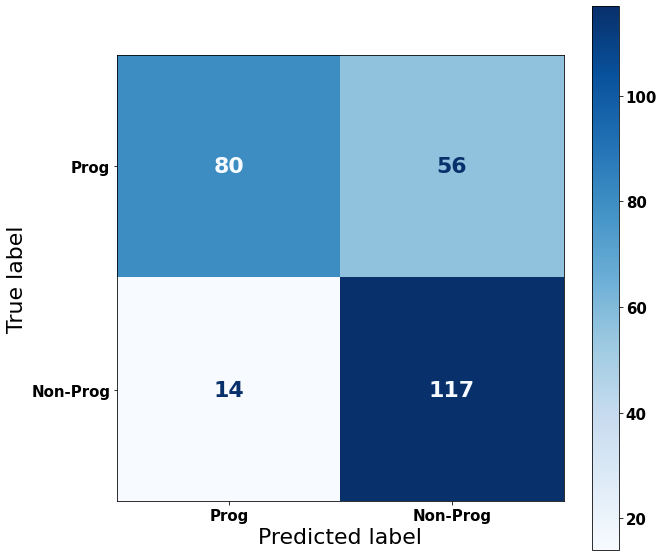

In [93]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Prog', 'Non-Prog'])

#cm_display.plot()
fig, ax = plt.subplots(figsize=(10,10))
font = {
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#plt.show()

In [84]:
(126+75)/(126+75+66)

0.7528089887640449

In [50]:
(117+80)/(114+76+60+17)

0.7378277153558053

In [53]:
import glob
# Prepare a list for all the features and all the labels
all_features_test_2 = []
all_labels_test_2 = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Other"]
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        if 'jazz.00054.wav' in song:
            features = extract_features_song_get_means(sound_files[i - 1])
        else:
            features = extract_features_song_get_means(song)

        all_features_test_2.append(features)
        if genre == 'Progressive':
            all_labels_test_2.append(0)
        else:
            all_labels_test_2.append(1)

Processing 22 songs in Other genre...
Prog_Dataset/Test/Other/01 Arithmophobia.mp3
(160, 15640)
Prog_Dataset/Test/Other/PERIPHERY - Zyglrox.mp3
(160, 13236)
Prog_Dataset/Test/Other/Meshuggah- Soul Burn.mp3
(160, 13695)
Prog_Dataset/Test/Other/06 A Light Will Shine.mp3
(160, 11326)
Prog_Dataset/Test/Other/05. Physical Education.mp3
(160, 12100)
Prog_Dataset/Test/Other/SikTh - Hold My Finger.mp3
(160, 16113)
Prog_Dataset/Test/Other/Veil Of Maya - Punisher.mp3
(160, 6550)
Prog_Dataset/Test/Other/CHIMP SPANNER - Bad Code.mp3
(160, 13138)
Prog_Dataset/Test/Other/The Algorithm - Isometry.mp3
(160, 8187)
Prog_Dataset/Test/Other/01-darko_us-splinter_cell.mp3
(160, 9909)
Prog_Dataset/Test/Other/03 - Language II Conspire.mp3
(160, 11008)
Prog_Dataset/Test/Other/MONUMENTS - I, The Creator.mp3
(160, 10507)
Prog_Dataset/Test/Other/HEART OF A COWARD - Hollow.mp3
(160, 11112)
Prog_Dataset/Test/Other/BORN OF OSIRIS - Divergency.mp3
(160, 10617)
Prog_Dataset/Test/Other/Hacktivist - DECEIVE AND DEFY.mp3

In [54]:
for song in all_features_test_2:
    for i in range(0, 160):
        song[i] = song[i] / dict_max[i]
for index, song in enumerate(all_features_test_2):
    shape = [160, max_shape]
    all_features_test_2[index] = to_shape(song, shape)


In [102]:
for index, song in enumerate(all_features_test_2):
    all_features_test_2[index] = all_features_test_2[index].T

In [55]:
features_test_2=np.stack(all_features_test_2)
labels_test_2=np.stack(all_labels_test_2)
features_test_2 = features_test_2.astype('float32')
labels_test_2 = labels_test_2.astype('int64')
features_tensor_test_2 = torch.from_numpy(features_test_2)
labels_tensor_test_2 = torch.from_numpy(labels_test_2)
dataset_test_2 = TensorDataset(features_tensor_test_2, labels_tensor_test_2)
test_dl_2 = DataLoader(dataset_test_2, batch_size = 267, num_workers = 2, pin_memory = True)
test_loader_2 = DeviceDataLoader(test_dl_2, device)

In [157]:
for state in test_loader_2:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)

[[ 0  0]
 [ 3 19]]


In [151]:
import glob
# Prepare a list for all the features and all the labels
song_names_2 = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Other"]
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        song_names_2.append(song)

Processing 22 songs in Other genre...


In [158]:
song_list = []
for sample, prediction in zip(state[0].numpy(), pred):
    if (prediction[0]>0.5):
        song_list.append((sample, 0))
    else:
        song_list.append((sample, 1))

In [167]:
song_names_2[0][24:]

'01 Arithmophobia.mp3'

In [168]:
res_dict_2 = []
for sample, prediction in song_list:
    for index, feature in enumerate(all_features_test_2):
        check = True
        for i in range(feature.shape[0]):
            if abs(feature[50][i] - sample[50][i]) >= 10**-20:
                check = False
                break
        if check:
            if prediction == 0:
                res_dict_2.append({'Song names': song_names_2[index][24:], 'Predicted label': 'Prog'})
                #print(prediction)
            else:
                res_dict_2.append({'Song names': song_names_2[index][24:], 'Predicted label': 'Non-Prog'})
                #print(1-prediction)
    #break
            #print(song_names[index])

In [169]:
# name of csv file
import csv

filename = "1D_CNN_PostProg_Prediction.csv"
fields = ['Song names', 'Predicted label']
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields)
 
    # writing headers (field names)
    writer.writeheader()
 
    # writing data rows
    writer.writerows(res_dict_2)